# Imports


In [1]:
#General
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from os.path import join
from google.colab import drive

# Dataset

## Data import



In [2]:
drive.mount('/content/gdrive')
file_path="/content/gdrive/MyDrive/Colab_Notebooks/0.Kaggle_Problems/Regression/Kaggle_Weather_prediction/Dataset/Summary_of_Weather.csv"
weather = pd.read_csv(file_path)
file_path="/content/gdrive/MyDrive/Colab_Notebooks/0.Kaggle_Problems/Regression/Kaggle_Weather_prediction/Dataset/Weather_Station_Locations.csv"
stations = pd.read_csv(file_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-2-42524797bd52>:3: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv(file_path)


In [3]:
print(weather.shape)
weather.head()

(119040, 31)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(stations.shape)
stations.head()

(161, 8)


,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


## Data exploration and cleaning

In [5]:
weather.columns,stations.columns

(Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
        'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
        'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
        'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
       dtype='object'),
 Index(['WBAN', 'NAME', 'STATE/COUNTRY ID', 'LAT', 'LON', 'ELEV', 'Latitude',
        'Longitude'],
       dtype='object'))

In [6]:
weather.isna().sum()

,0
STA,0
Date,0
Precip,0
WindGustSpd,118508
MaxTemp,0
MinTemp,0
MeanTemp,0
Snowfall,1163
PoorWeather,84803
YR,0


As we can see many features don't have any values, so i'm just going to get rid of these features.
Also other features (as PRPT, MAX, MIN, MEAN, SNF are just Precip, MinTemp, MaxTemp, MeanTemp, Snowfall but with a different metric). Therefore i am going to get rid of them as well.

In [7]:
useful_features = ['STA', 'Date', 'YR', 'MO', 'DA', 'Precip', 'MinTemp', 'MaxTemp',
                   'MeanTemp', 'Snowfall', 'PoorWeather']

filtered_weather = weather[useful_features]

In [8]:
weather = filtered_weather.copy()
weather.head()

,STA,Date,YR,MO,DA,Precip,MinTemp,MaxTemp,MeanTemp,Snowfall,PoorWeather
0,10001,1942-7-1,42,7,1,1.016,22.222222,25.555556,23.888889,0.0,NaN
1,10001,1942-7-2,42,7,2,0,21.666667,28.888889,25.555556,0.0,NaN
2,10001,1942-7-3,42,7,3,2.54,22.222222,26.111111,24.444444,0.0,NaN
3,10001,1942-7-4,42,7,4,2.54,22.222222,26.666667,24.444444,0.0,NaN
4,10001,1942-7-5,42,7,5,0,21.666667,26.666667,24.444444,0.0,NaN


PoorWeather doesn't look right since it has too many missing values to be such a simple weather measure.

In [23]:
print(f"Values count for PoorWeather:",weather['PoorWeather'].value_counts().sum())
weather['PoorWeather'].value_counts()

Values count for PoorWeather: 119040


,count
PoorWeather,
0,84803
1,34237


The 'PoorWeather' is defined as follows:

Copy of TSHDSBRSGF

Day with:
- Thunder
- Sleet
- Hail
- Dust or Sand
- Smoke or Haze
- Blowing Snow
- Rain
- Snow
- Glaze
- Fog

Yes = 1, No = 0

From a fist look, a one-hot encoding of these possibilities would be ideal, but since these bad metereological effects affect weather temperatures negatively, i think it is more suitable to convert these values as such:
- 1 if there were any registered weather condition
- 0 otherwhise

In [10]:
weather.loc[weather["PoorWeather"].isna(), "PoorWeather"] = 0
weather.loc[weather["PoorWeather"]!= 0, "PoorWeather"] = 1
weather["PoorWeather"] = weather["PoorWeather"].astype('string')
print(f"PoorWeather dtype:",weather["PoorWeather"].dtype)
weather["PoorWeather"].value_counts()

PoorWeather dtype: string


,count
PoorWeather,
0,84803
1,34237


Let's now try to fix the "Precip" feature, related to the amount of precipitation in mm.


"T" in Precipitation stands for ***traces of precipitation*** and since i want this feature to be dtype: float i need to take a look at the lowest non-zero value in order to define a suitable float substitute for T.

In [11]:
temp = weather[weather["Precip"]!="T"]
weather2 = temp.copy()
weather2["Precip"] = weather2["Precip"].astype('float64')
print(f"Min non-zero value as Precip:",weather2["Precip"].loc[weather2["Precip"]>0].min())

Min non-zero value as Precip: 0.254


I am then going to set the corrisponding float64 value for T as 0.1 and then change the dtype of this feature to float64

In [12]:
weather.loc[weather["Precip"] == "T", "Precip"] = 0.1
weather["Precip"] = weather["Precip"].astype('float64')

The last thing to look at is the "Snowfall" feature since it has a few missing values

In [13]:
print(weather["Snowfall"].isna().value_counts(),"\n\n")
weather[weather["Snowfall"].isna()]

Snowfall
False    117877
True       1163
Name: count, dtype: int64 




,STA,Date,YR,MO,DA,Precip,MinTemp,MaxTemp,MeanTemp,Snowfall,PoorWeather
2722,10101,1945-4-2,45,4,2,45.212,21.666667,30.000000,26.111111,NaN,0
2746,10101,1945-4-26,45,4,26,3.556,24.444444,31.111111,27.777778,NaN,0
13529,10803,1940-12-26,40,12,26,0.000,22.777778,30.555556,26.666667,NaN,0
17907,10807,1945-11-19,45,11,19,108.204,18.888889,30.555556,24.444444,NaN,0
30501,11901,1942-10-3,42,10,3,0.100,-17.777778,-17.777778,-17.777778,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
97418,44401,1945-11-12,45,11,12,14.224,-1.111111,2.777778,1.111111,NaN,1
97420,44401,1945-11-14,45,11,14,0.100,2.222222,12.777778,7.777778,NaN,1
97525,50301,1943-10-31,43,10,31,0.000,23.333333,29.444444,26.666667,NaN,0
97590,50301,1944-1-4,44,1,4,0.000,23.888889,30.000000,26.666667,NaN,0


The first thing i can think of is to set it to 0 where the MinTemp > x since there cannot be snow where the ***atmospheric*** temperature is greater than 0, but these values are regarding the ground temperature. I just need to find a good 'x' value. Since i don't have this information i am going to guess it based on my personal experience and set it equal to 3 (since sometimes it snows when it is not 0°C).

In [14]:
weather.loc[(weather["Snowfall"].isna()) & (weather["MinTemp"] >= 3), "Snowfall"] = 0
weather[weather["Snowfall"].isna()]

,STA,Date,YR,MO,DA,Precip,MinTemp,MaxTemp,MeanTemp,Snowfall,PoorWeather
30501,11901,1942-10-3,42,10,3,0.100,-17.777778,-17.777778,-17.777778,NaN,1
35646,12702,1944-3-13,44,3,13,0.000,-17.777778,-17.777778,-17.777778,NaN,0
36078,12702,1945-5-19,45,5,19,0.000,-17.777778,-17.777778,-17.777778,NaN,0
36205,12706,1945-4-10,45,4,10,0.100,-17.777778,-17.777778,-17.777778,NaN,1
36224,12706,1945-4-29,45,4,29,0.000,-17.777778,-17.777778,-17.777778,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
97209,43302,1945-11-1,45,11,1,0.000,-17.777778,-17.777778,-17.777778,NaN,0
97347,43305,1945-12-18,45,12,18,1.778,1.111111,5.000000,3.333333,NaN,1
97409,44401,1945-11-3,45,11,3,1.016,1.666667,8.333333,5.000000,NaN,1
97418,44401,1945-11-12,45,11,12,14.224,-1.111111,2.777778,1.111111,NaN,1


<Axes: >

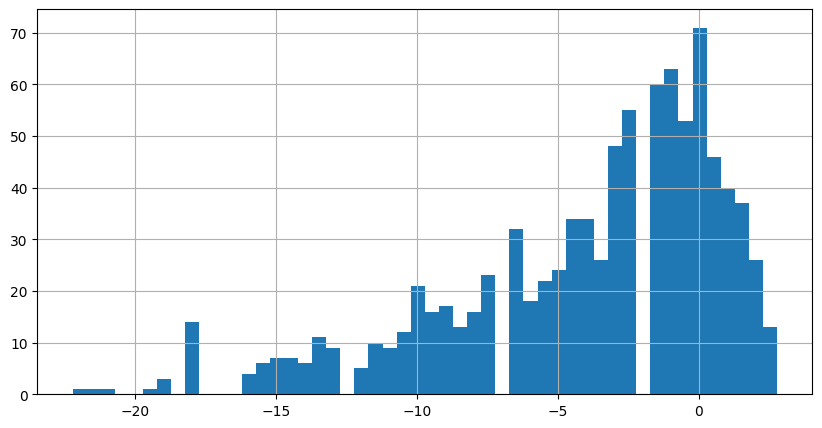

In [15]:
weather["MinTemp"].loc[(weather["Snowfall"].isna()) & (weather["MinTemp"] < 3)].hist(figsize=(10,5), bins=50)

The best idea right now would probably be to interpolate/bfill/ffill the NaN "Snowfall" data according to the same weather stations ordered by date using:

```
weather.sort_values(['STA', 'YR', 'MO', 'DA',], ascending=[True, True, True, True])
```

The main reason why i don't think this would be too good is because we have daily measurements, so one day might have snowed a lot while others none. For this exact reason i guess i'm more prone to use the interpolation. I would prefer to not get rid of these rows since "SnowFall" is the only missing value and they all represent a part of the population where the temperatures are low.




In [16]:
weather.sort_values(['STA', 'YR', 'MO', 'DA',], ascending=[True, True, True, True])
weather["STA"] = weather["STA"].astype('string')
weather["STA"].loc[weather["Snowfall"].isna()].value_counts()

,count
STA,
16405,227
16407,165
16201,145
16202,82
16504,71
15027,59
16101,52
33406,27
33501,21


I am interested in looking at an example of station with missing values. In particular i'm going to dive into the one that registered the maximum amount of NaN values to see if it's interesting to apply interpolation to fill the voids.

In [17]:
#weather["MinTemp"].loc[(weather["STA"] == "16405") & (weather["Snowfall"].isna())]
pd.set_option('display.max_rows', None)  # Show all rows
display(weather[weather["STA"] == "16405"])
pd.reset_option('display.max_rows')

,STA,Date,YR,MO,DA,Precip,MinTemp,MaxTemp,MeanTemp,Snowfall,PoorWeather
45230,16405,1941-7-22,41,7,22,2.794,6.666667,10.000000,8.333333,0,0
45231,16405,1941-7-23,41,7,23,0.000,4.444444,13.333333,8.888889,0,0
45232,16405,1941-7-24,41,7,24,0.000,3.333333,17.777778,13.888889,0,0
45233,16405,1941-7-25,41,7,25,0.000,6.111111,20.000000,13.333333,0,0
45234,16405,1941-7-26,41,7,26,0.000,12.222222,18.888889,15.555556,0,0
45235,16405,1941-7-27,41,7,27,0.000,9.444444,15.000000,12.222222,0,0
45236,16405,1941-7-28,41,7,28,0.000,8.888889,15.555556,12.222222,0,0
45237,16405,1941-7-29,41,7,29,0.000,10.000000,12.222222,11.111111,0,0
45238,16405,1941-7-30,41,7,30,4.064,10.000000,18.333333,14.444444,0,0
45239,16405,1941-7-31,41,7,31,13.716,7.777778,15.555556,11.666667,0,0


I came to the conclusion that interpolation seems the most logic answer for this specif problem, therefore i am going to apply it.

In [18]:
weather["Snowfall"] = pd.to_numeric(weather["Snowfall"], errors='coerce')
weather["Snowfall"] = weather["Snowfall"].astype('float64')
weather["Snowfall"].interpolate(inplace=True)
weather["Snowfall"].isna().value_counts()

<ipython-input-18-13f170636d56>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather["Snowfall"].interpolate(inplace=True)


,count
Snowfall,
False,119040


I think i'm almost done with the preprocessing of my dataset.

Let's now take a look at the histogram of the features to see if we notice something strange.

array([[<Axes: title={'center': 'YR'}>, <Axes: title={'center': 'MO'}>,
        <Axes: title={'center': 'DA'}>],
       [<Axes: title={'center': 'Precip'}>,
        <Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>],
       [<Axes: title={'center': 'MeanTemp'}>,
        <Axes: title={'center': 'Snowfall'}>, <Axes: >]], dtype=object)

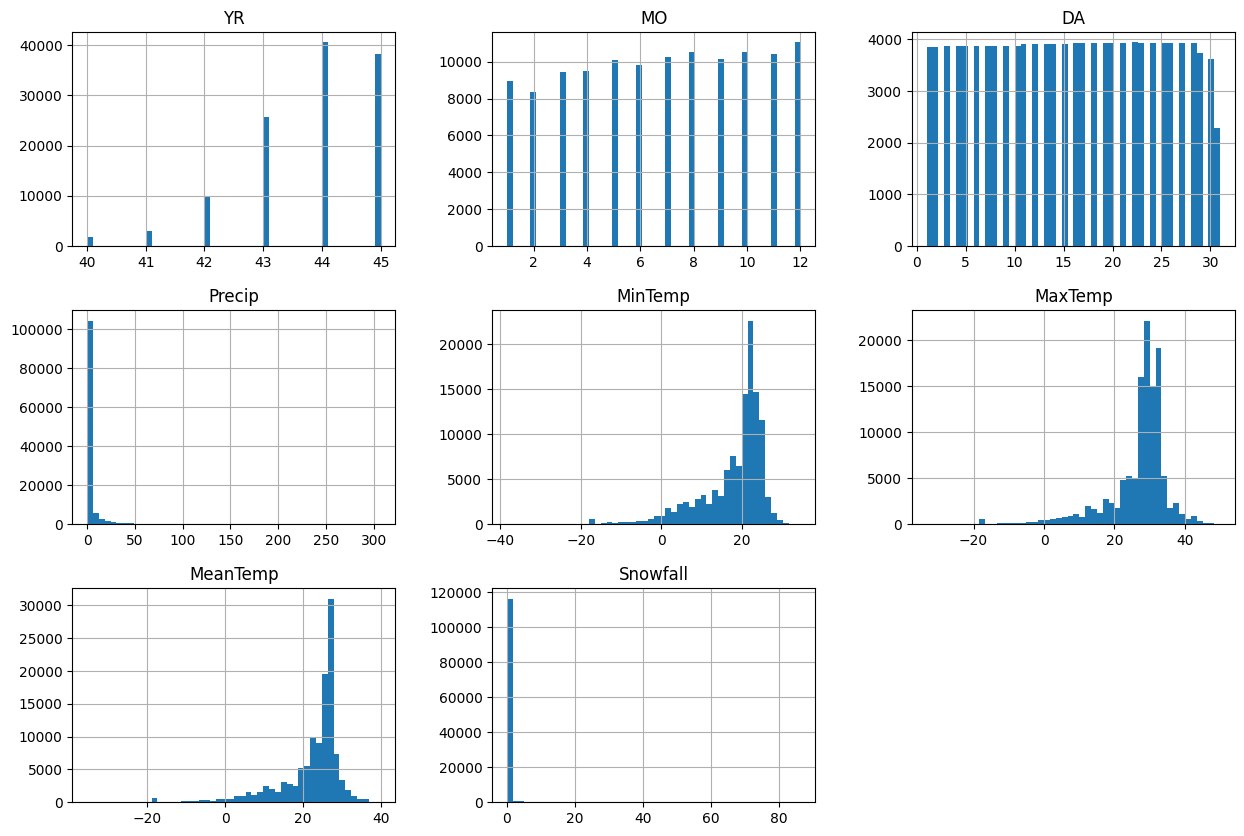

In [22]:
weather.hist(figsize=(15,10),bins=50)

The only thing that comes to my mind is the fact that MeanTemp seems directly correlated with MaxTemp (target feature), therefore i need to take into account the possibility to remove it in order to obtain the realistic performances of my models.

The last thing to do before preparing the benchmark model is to check the dtypes and the scale of the measurements to be sure they are all coherent.